In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_breast_cancer


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
baseline = LogisticRegression(max_iter=5000)
baseline.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

In [7]:
preds = baseline.predict(X_test)
print("Baseline Model")
print(classification_report(y_test, preds))


Baseline Model
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest")
print(classification_report(y_test, rf_preds))


Random Forest
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [9]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print("Gradient Boosting")
print(classification_report(y_test, gb_preds))


Gradient Boosting
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [10]:
estimators = [
    ("rf", RandomForestClassifier()),
    ("svm", SVC(probability=True))
]
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)
stack_model.fit(X_train, y_train)
stack_preds = stack_model.predict(X_test)
print("Stacking Model")
print(classification_report(y_test, stack_preds))


Stacking Model
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [11]:
models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Stacking": stack_model
}

for name, model in models.items():
    prob = model.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test, prob)
    print(name, "ROC AUC:", score)


Random Forest ROC AUC: 0.9937766131673764
Gradient Boosting ROC AUC: 0.9944317065181788
Stacking ROC AUC: 0.9970520799213888


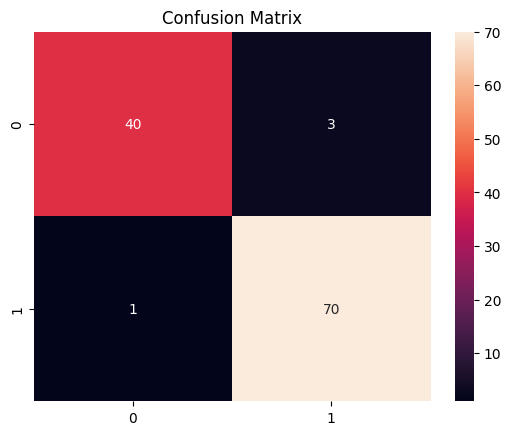

In [12]:
best_model = stack_model
preds = best_model.predict(X_test)

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()


In [15]:
results = []

models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Stacking": stack_model
}

for name, model in models.items():
    preds = model.predict(X_test)
    prob = model.predict_proba(X_test)[:,1]

    accuracy = (preds == y_test).mean()
    roc = roc_auc_score(y_test, prob)

    results.append([name, accuracy, roc])

comparison_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "ROC AUC"]
)

print(comparison_df)


               Model  Accuracy   ROC AUC
0      Random Forest  0.964912  0.993777
1  Gradient Boosting  0.956140  0.994432
2           Stacking  0.964912  0.997052


<Figure size 640x480 with 0 Axes>

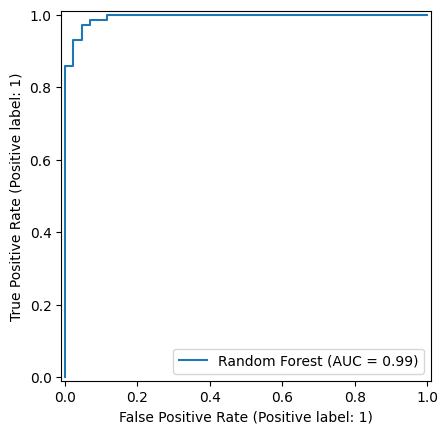

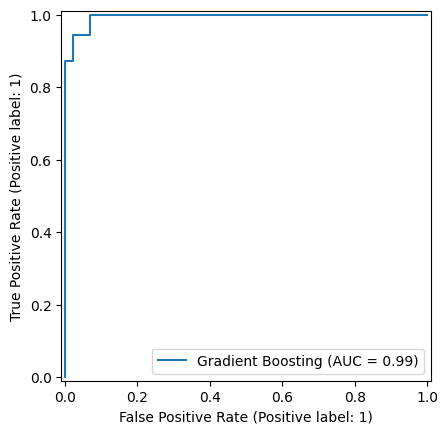

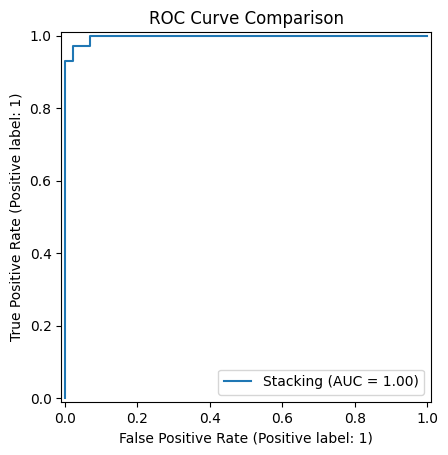

In [16]:
from sklearn.metrics import RocCurveDisplay

plt.figure()

for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)

plt.title("ROC Curve Comparison")
plt.show()


In [13]:
importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print(importance_df.head())


                 Feature  Importance
27  worst concave points    0.147569
7    mean concave points    0.126425
22       worst perimeter    0.115613
23            worst area    0.089186
20          worst radius    0.079765


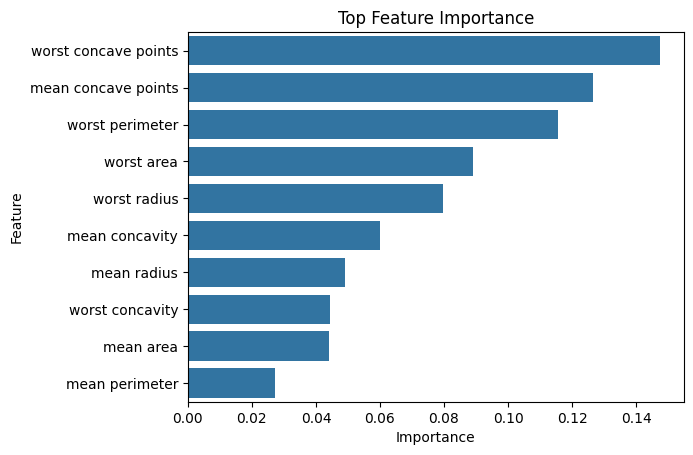

In [14]:
sns.barplot(data=importance_df.head(10), x="Importance", y="Feature")
plt.title("Top Feature Importance")
plt.show()


Advantages & Disadvantages

#Ensemble Method Comparison
* Random Forest (Bagging)

Advantages:

Reduces overfitting

Handles high-dimensional data well

Robust and stable

Disadvantages:

Can be slow with many trees

Less interpretable than simple models

* Gradient Boosting (Boosting)

Advantages:

High predictive accuracy

Learns complex patterns

Focuses on difficult samples

Disadvantages:

Sensitive to noise

Can overfit if not tuned properly

Training can be slow

* Stacking

Advantages:

Combines strengths of multiple models

Often provides best performance

Flexible architecture

Disadvantages:

Computationally expensive

Complex to implement

Harder to interpret